# Neo4J GDS 

https://neo4j.com/docs/graph-data-science/current/algorithms/linkprediction/

## Topological link prediction

Link prediction algorithms help determine the closeness of a pair of nodes using the topology of the graph. The computed scores can then be used to predict new relationships between them



#### Alpha

Adamic Adar

Common Neighbors

Preferential Attachment

Resource Allocation

Same Community

Total Neighbors



https://neo4j.com/docs/graph-data-science/current/introduction/#introduction-tiers

In [1]:
from langchain.graphs import Neo4jGraph

graph = Neo4jGraph(
    url="bolt://100.26.193.165:7687",
    username="neo4j",
    password="tie-rubbish-word"
)

r = graph.query("""MATCH (n:Airport {city:"Los Angeles"}) RETURN n""")
print(r)

[{'n': {'altitude': 127, 'descr': 'Los Angeles International Airport', 'longest': 12091, 'iata': 'LAX', 'city': 'Los Angeles', 'icao': 'KLAX', 'location': POINT(-118.4079971 33.94250107), 'id': '13', 'pagerank': 8.193558075446687, 'runways': 4, 'region_airports': 1, 'country_airports': 1}}]


### Adamic Adar


https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/adamic-adar/


https://www.semanticscholar.org/paper/Friends-and-neighbors-on-the-Web-Adamic-Adar/8dc9d11e3fc229a1b70bb00de72dc15d55848174

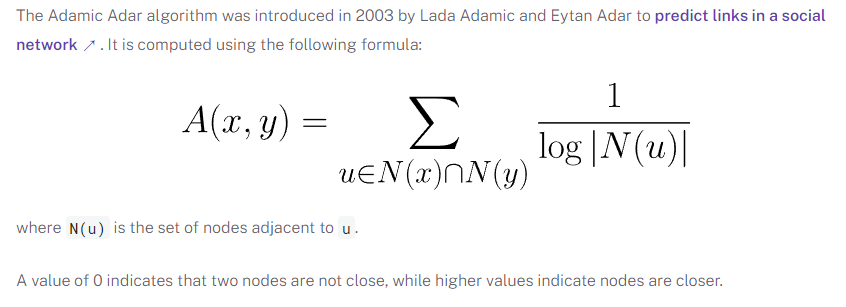

https://medium.com/@13pandey.shivanand/adar-adamic-index-96299b9fbe1c

Is a measure used to compute the closeness of nodes based on their shared neighbors. 

Higher values means that there is more likelihhod of having a connection in between the nodes.
We can see that two nodes X and Y for which we need to compute the Adar index value. If the Adar index value is zero then there are no links between X and Y but if it has a high value there is a high chance of a link between them. But what are the neighbours? A node that is directly connected to another node is the neighbour of that node

In [13]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.adamicAdar(p1, p2) AS score
""")
print(r)

[{'score': 0.4671094388828412}]


In [11]:
r = graph.query("""
 MATCH (p1:Airport {descr:'La Tontouta International Airport'})
 MATCH (p2:Airport {descr: 'Nador International Airport'})
 RETURN gds.alpha.linkprediction.adamicAdar(p1, p2) AS score
""")
print(r)

[{'score': 0.0}]


In [14]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Anchorage Ted Stevens'})
 RETURN gds.alpha.linkprediction.adamicAdar(p1, p2) AS score
""")
print(r)

[{'score': 2.413910906031811}]


In [18]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.adamicAdar(p1, p2,  {relationshipQuery: 'HAS_ROUTE'}) AS score
""")
print(r)

[{'score': 31.613377247170824}]


In [19]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.adamicAdar(p1, p2,  {relationshipQuery: 'IN_CITY'}) AS score
""")
print(r)

[{'score': 0.0}]


# Common Neighbors

Common neighbors captures the idea that two strangers who have a friend in common are more likely to be introduced than those who don’t have any friends in common.

https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/common-neighbors/

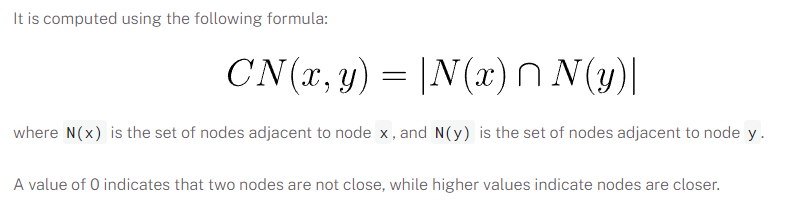

In [20]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2) AS score
""")
print(r)

[{'score': 3.0}]


In [21]:
r = graph.query("""
 MATCH (p1:Airport {descr:'La Tontouta International Airport'})
 MATCH (p2:Airport {descr: 'Nador International Airport'})
 RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2) AS score
""")
print(r)


[{'score': 0.0}]


In [22]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2,  {relationshipQuery: 'HAS_ROUTE'}) AS score
""")
print(r)

[{'score': 134.0}]


In [23]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2,  {relationshipQuery: 'IN_CITY'}) AS score
""")
print(r)

[{'score': 0.0}]


# Preferential Attachment
https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/preferential-attachment/

Preferential Attachment is a measure used to compute the closeness of nodes, based on their shared neighbors.

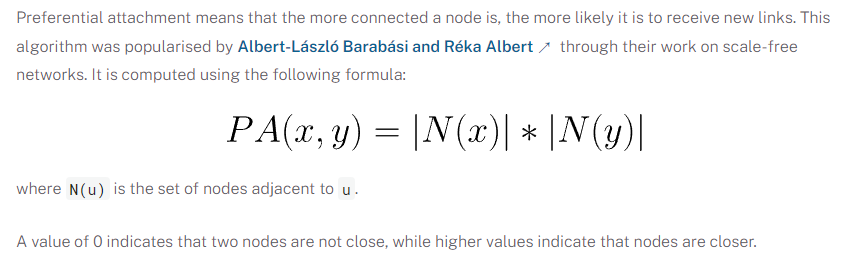

In [26]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.preferentialAttachment(p1, p2) AS score
""")
print(r)

[{'score': 12024.0}]


In [24]:
r = graph.query("""
 MATCH (p1:Airport {descr:'La Tontouta International Airport'})
 MATCH (p2:Airport {descr: 'Nador International Airport'})
 RETURN gds.alpha.linkprediction.preferentialAttachment(p1, p2) AS score
""")
print(r)

[{'score': 2992.0}]


In [25]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.preferentialAttachment(p1, p2,  {relationshipQuery: 'HAS_ROUTE'}) AS score
""")
print(r)

[{'score': 210578.0}]


In [27]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.preferentialAttachment(p1, p2,  {relationshipQuery: 'IN_CITY'}) AS score
""")
print(r)

[{'score': 1.0}]


# Resource Allocation


https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/resource-allocation/


Resource Allocation is a measure used to compute the closeness of nodes based on their shared neighbors

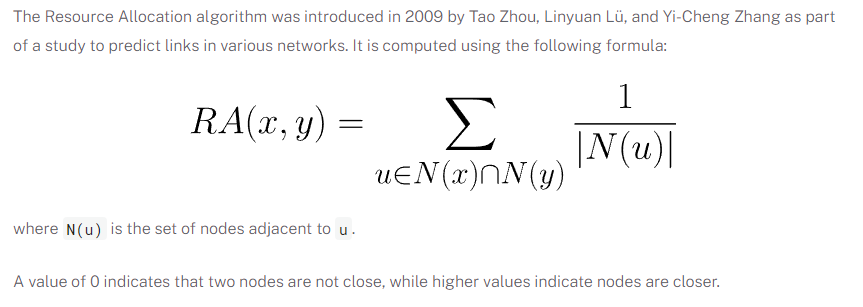
t.

In [28]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.resourceAllocation(p1, p2) AS score
""")
print(r)

[{'score': 0.007327922606528817}]


In [29]:
r = graph.query("""
 MATCH (p1:Airport {descr:'La Tontouta International Airport'})
 MATCH (p2:Airport {descr: 'Nador International Airport'})
 RETURN gds.alpha.linkprediction.resourceAllocation(p1, p2) AS score
""")
print(r)

[{'score': 0.0}]


In [30]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.resourceAllocation(p1, p2,  {relationshipQuery: 'HAS_ROUTE'}) AS score
""")
print(r)


[{'score': 2.6843103088511984}]


In [31]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.resourceAllocation(p1, p2,  {relationshipQuery: 'IN_CITY'}) AS score
""")
print(r)

[{'score': 0.0}]


### Same Community

https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/same-community//

Same Community is a way of determining whether two nodes belong to the same community. These communities could be computed by using one of the Community detection.

https://neo4j.com/docs/graph-data-science/current/algorithms/community/


If two nodes belong to the same community, there is a greater likelihood that there will be a relationship between them in future, if there isn’t already.

A value of 0 indicates that two nodes are not in the same community. A value of 1 indicates that two nodes are in the same communit

By default, the community is read from the community propertyy..

In [32]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.sameCommunity(p1, p2) AS score
""")
print(r)


[{'score': 0.0}]


# Total Neighbors

https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/total-neighbors/

Total Neighbors computes the closeness of nodes, based on the number of unique neighbors that they have. It is based on the idea that the more connected a node is, the more likely it is to receive new links.

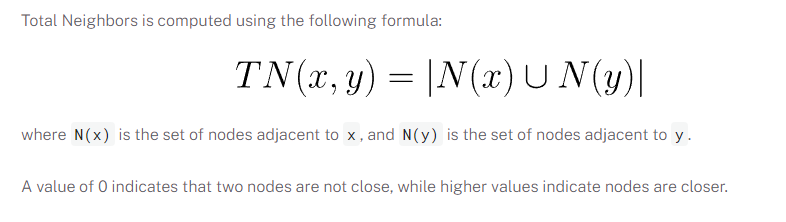

In [33]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {descr: 'Dillingham Airport'})
 RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score
""")
print(r)

[{'score': 258.0}]


In [34]:
r = graph.query("""
 MATCH (p1:Airport {descr:'La Tontouta International Airport'})
 MATCH (p2:Airport {descr: 'Nador International Airport'})
 RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score
""")
print(r)

[{'score': 34.0}]


In [35]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2,  {relationshipQuery: 'HAS_ROUTE'}) AS score
""")
print(r)

[{'score': 330.0}]


In [36]:
r = graph.query("""
 MATCH (p1:Airport {descr:'Dallas/Fort Worth International Airport'})
 MATCH (p2:Airport {city:'Los Angeles'})
 RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2,  {relationshipQuery: 'IN_CITY'}) AS score
""")
print(r)

[{'score': 2.0}]
